<a href="https://colab.research.google.com/github/UswatunH06/Statmul/blob/main/Remedial_Statmul_053_Uswatun_Hasanah_MANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama   : Uswatun Hasanah

Nim    : 11220940000053

Kelas : 6B

Remedia Manova

##**Pengaruh Status Sosial Ekonomi Orang Tua terhadap Nilai Akademik Siswa Menggunakan Metode MANOVA**

# Install dan Import Library

In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

##Manova

Dalam studi ini, peneliti ingin menguji apakah status sosial ekonomi orang tua berpengaruh terhadap nilai akademik siswa. Untuk keperluan analisis, peneliti membuat contoh kasus dengan menggunakan data yang dihasilkan secara acak. Status ekonomi orang tua diklasifikasikan ke dalam tiga kelompok, yaitu ekonomi rendah, menengah, dan tinggi. Selanjutnya, nilai siswa pada mata pelajaran Matematika, IPA, dan Bahasa Indonesia dibandingkan antar ketiga kelompok tersebut untuk melihat adanya perbedaan nilai berdasarkan status sosial ekonomi.

#Data

In [3]:
import pandas as pd

# Baca file Excel
data_manova = pd.read_excel('/content/data_manova.xlsx')

# Tampilkan 5 baris pertama
print(data_manova.head())

         Kelompok  Nilai_Matematika  Nilai_IPA  Nilai_Bahasa_Indonesia
0  Ekonomi Rendah                60         58                      66
1  Ekonomi Rendah                62         60                      72
2  Ekonomi Rendah                60         67                      60
3  Ekonomi Rendah                66         62                      63
4  Ekonomi Rendah                56         59                      62


#Uji Normalitas Multivariat

In [6]:
data_Rendah= data_manova.loc[data_manova['Kelompok']=='Ekonomi Rendah', ['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']]
data_Menengah = data_manova.loc[data_manova['Kelompok']=='Ekonomi Menengah', ['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']]
data_Tinggi = data_manova.loc[data_manova['Kelompok']=='Ekonomi Tinggi', ['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']]

In [7]:
print('uji normalitas multivariat Ekonomi Rendah: ', pg.multivariate_normality(data_Rendah, alpha=0.05))
print('uji normalitas multivariat Ekonomi Menengah: ', pg.multivariate_normality(data_Menengah, alpha=0.05))
print('uji normalitas multivariat Ekonomi Tinggi: ', pg.multivariate_normality(data_Tinggi, alpha=0.05))

uji normalitas multivariat Ekonomi Rendah:  HZResults(hz=np.float64(8.48760121967042), pval=np.float64(4.338697743575299e-29), normal=False)
uji normalitas multivariat Ekonomi Menengah:  HZResults(hz=np.float64(8.48760121967042), pval=np.float64(4.338697743575299e-29), normal=False)
uji normalitas multivariat Ekonomi Tinggi:  HZResults(hz=np.float64(8.48760121967042), pval=np.float64(4.338697743575299e-29), normal=False)


karena pada ketiga data memiliki nilai p-value< 0.05, maka tolak H0 sehingga dapat disimpulkan data tidak berdistribusi normal multivariat. selanjutnya dilakukan transformasi pada data.

In [8]:
#Transformasi
data_Rendah_trans = np.sqrt(data_Rendah)
data_Menengah_trans = np.sqrt(data_Menengah)
data_Tinggi_trans = np.sqrt(data_Tinggi)

In [9]:
print('uji normalitas multivariat Ekonomi Rendah: ', pg.multivariate_normality(data_Rendah_trans, alpha=0.05))
print('uji normalitas multivariat Ekonomi Menengah: ', pg.multivariate_normality(data_Menengah_trans, alpha=0.05))
print('uji normalitas multivariat Ekonomi Tinggi: ', pg.multivariate_normality(data_Tinggi_trans, alpha=0.05))

uji normalitas multivariat Ekonomi Rendah:  HZResults(hz=np.float64(0.4578753707080675), pval=np.float64(0.7138750859169586), normal=True)
uji normalitas multivariat Ekonomi Menengah:  HZResults(hz=np.float64(0.42501790476055984), pval=np.float64(0.8059526594481143), normal=True)
uji normalitas multivariat Ekonomi Tinggi:  HZResults(hz=np.float64(0.49217927327821487), pval=np.float64(0.6084561911104422), normal=True)


Setelah data diransformasi dilakukan uji normalisasi kembali, sehingga pada ketiga data didapat nilai p-value>0.05, maka terima H0. Sehingga dapat disimpulkan data berdistribusi normal multivariat.

#Uji Homogenitas

In [10]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_Rendah_trans, data_Menengah_trans, data_Tinggi_trans])
data_trans_manova['Kelompok'] = data_manova['Kelompok'].copy()
data_trans_manova

,Nilai_Matematika,Nilai_IPA,Nilai_Bahasa_Indonesia,Kelompok
0,7.745967,7.615773,8.124038,Ekonomi Rendah
1,7.874008,7.745967,8.485281,Ekonomi Rendah
2,7.745967,8.185353,7.745967,Ekonomi Rendah
3,8.124038,7.874008,7.937254,Ekonomi Rendah
4,7.483315,7.681146,7.874008,Ekonomi Rendah
5,7.549834,7.874008,7.416198,Ekonomi Rendah
6,8.124038,7.549834,8.185353,Ekonomi Rendah
7,7.745967,7.416198,8.185353,Ekonomi Rendah
8,7.416198,8.000000,8.062258,Ekonomi Rendah
9,7.681146,8.185353,7.937254,Ekonomi Rendah


In [11]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia'], group='Kelompok')

,Chi2,df,pval,equal_cov
box,19.742034,12.0,0.072126,True


Karena nilai p-value = 0,07>0,05 maka terima H0, sehingga dapat disimpulkan bahwa matriks variansi kovariansi homogen.

## MANOVA


In [12]:
manova_model = MANOVA.from_formula('Nilai_Matematika + Nilai_IPA + Nilai_Bahasa_Indonesia ~ Kelompok', data=data_trans_manova)
manova_result = manova_model.mv_test()
print(manova_result)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value   Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0012 3.0000 40.0000 11277.1149 0.0000
         Pillai's trace   0.9988 3.0000 40.0000 11277.1149 0.0000
 Hotelling-Lawley trace 845.7836 3.0000 40.0000 11277.1149 0.0000
    Roy's greatest root 845.7836 3.0000 40.0000 11277.1149 0.0000
-----------------------------------------------------------------
                                                                 
------------------------------------------------------------------
         Kelompok         Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda  0.1789  6.0000  80.0000  18.1876  0.0000
          Pillai's trace  

Pada kasus ini,dari 4 statistik tersebut sama-sama memiliki p-value<0.05,
artinya tolak H0. Maka dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara kelompok ekonomi terhadap nilai akademik siswa.

#Uji Post Hoc

Disini kita akan melihat pasangan kelompok mana yang berbeda signifikan antar ke-3nya

In [13]:
tukey_Nilai_Matematika = pg.pairwise_tukey(data=data_trans_manova, dv='Nilai_Matematika', between='Kelompok')
print("Tukey Post-hoc untuk variabel Nilai Matematika")
tukey_Nilai_Matematika

Tukey Post-hoc untuk variabel Nilai Matematika


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Ekonomi Menengah,Ekonomi Rendah,7.906153,7.650555,0.255598,0.123799,2.064618,1.096274e-01,0.844792
1,Ekonomi Menengah,Ekonomi Tinggi,7.906153,8.538535,-0.632382,0.123799,-5.108129,2.201943e-05,-1.671837
2,Ekonomi Rendah,Ekonomi Tinggi,7.650555,8.538535,-0.887980,0.123799,-7.172747,2.455260e-08,-2.466178


Seluruh pasangan kelompok status sosial ekonomi (rendah-tinggi, dan menengah-tinggi) memiliki p-value < 0,05, artinya tolak H0. Maka terdapat perbedaan rata-rata nilai Matematika yang signifikan antara pasangan kelompok tersebut. Sementara untuk menengah-rendah memiliki p-value > 0,05, artinya terima H0. Maka tidak terdapat perbedaan rata-rata nilai Matematika yang signifikan antara pasangan kelompok tersebut.

In [14]:
tukey_Nilai_IPA = pg.pairwise_tukey(data=data_trans_manova, dv='Nilai_IPA', between='Kelompok')
print("Tukey Post-hoc untuk variabel Nilai IPA")
tukey_Nilai_IPA

Tukey Post-hoc untuk variabel Nilai IPA


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Ekonomi Menengah,Ekonomi Rendah,8.195372,7.822440,0.372932,0.143571,2.597541,0.033781,0.887561
1,Ekonomi Menengah,Ekonomi Tinggi,8.195372,8.505632,-0.310261,0.143571,-2.161022,0.089926,-0.690512
2,Ekonomi Rendah,Ekonomi Tinggi,7.822440,8.505632,-0.683193,0.143571,-4.758563,0.000068,-2.046251


Seluruh pasangan kelompok status sosial ekonomi (rendah-tinggi, dan menengah-rendah) memiliki p-value < 0,05, artinya tolak H0. Maka terdapat perbedaan rata-rata nilai IPA yang signifikan antara pasangan kelompok tersebut. Sementara untuk menengah-tinggi memiliki p-value > 0,05, artinya terima H0. Maka tidak terdapat perbedaan rata-rata nilai IPA yang signifikan antara pasangan kelompok tersebut.




In [15]:
tukey_Nilai_Bahasa_Indonesia = pg.pairwise_tukey(data=data_trans_manova, dv='Nilai_Bahasa_Indonesia', between='Kelompok')
print("Tukey Post-hoc untuk variabel Nilai Bahasa Indonesia")
tukey_Nilai_Bahasa_Indonesia

Tukey Post-hoc untuk variabel Nilai Bahasa Indonesia


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Ekonomi Menengah,Ekonomi Rendah,8.467162,7.924105,0.543058,0.140865,3.855172,0.001115,1.446529
1,Ekonomi Menengah,Ekonomi Tinggi,8.467162,8.761603,-0.294441,0.140865,-2.090240,0.104075,-0.669819
2,Ekonomi Rendah,Ekonomi Tinggi,7.924105,8.761603,-0.837499,0.140865,-5.945412,0.000001,-2.259074


Seluruh pasangan kelompok status sosial ekonomi (rendah-tinggi, dan menengah-rendah) memiliki p-value < 0,05, artinya tolak H0. Maka terdapat perbedaan rata-rata nilai Bahasa Indonesia yang signifikan antara pasangan kelompok tersebut. Sementara untuk menengah-tinggi memiliki p-value > 0,05, artinya terima H0. Maka tidak terdapat perbedaan rata-rata nilai Bahasa Indonesia yang signifikan antara pasangan kelompok tersebut.


## Visualisasi Data

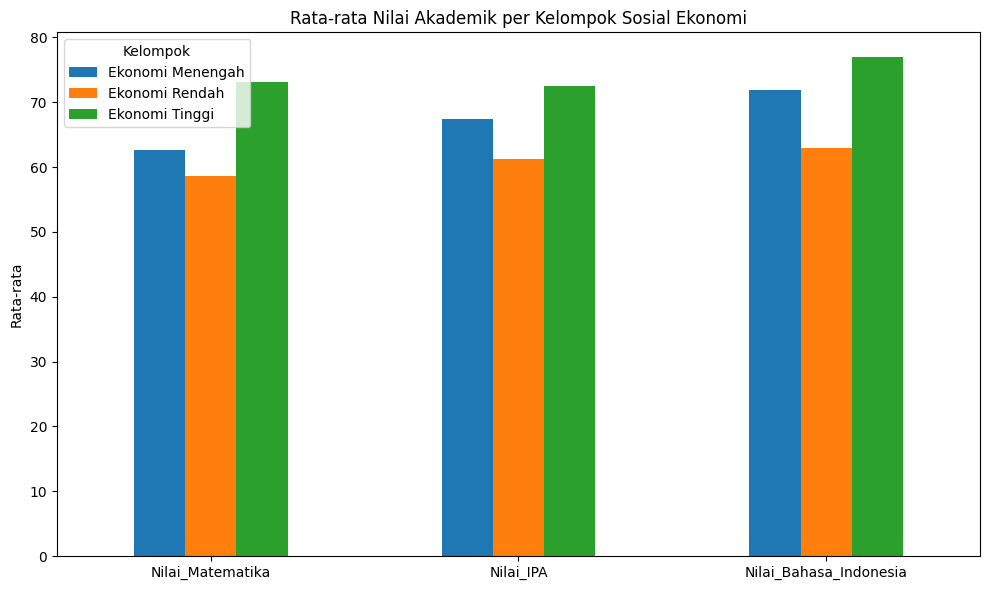

In [16]:
data_manova.groupby('Kelompok')[['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']].mean().T.plot(
    kind='bar', figsize=(10, 6)  # Tambahkan ukuran figure
)
plt.title('Rata-rata Nilai Akademik per Kelompok Sosial Ekonomi')
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.tight_layout()  # Supaya layout lebih rapi dan tidak terpotong
plt.show()

Ternyata kelompok ekonomi yang paling berpengaruh terhadap tingginya ketiga nilai yaitu kelompok ekonomi tinggi

##Kesimpulan
Berdasarkan hasil analisis dapat disimpulkan bahwa status sosial ekonomi orang tua mempengaruhi nilai akademik siswa, terutama pada mata pelajaran Matematika, IPA dan Bahasa Indonesia. Hasil analissi MANOVA menunjukkan bahwa terdapat perbedaan yang signifikan antara kelompok status sosial ekonomi rendah, menengah dan tinggi orang tua  terhadap nilai Matematika, IPA dan Bahasa Indonesia siswa.

Hasil uji Post Hoc menunjukkan bahwa kelompok tinggi berbeda signifikan dengan kelompok rendah dan menengah pada Matematika, sementara pada IPA dan Bahasa Indonesia, kelompok rendah berbeda signifikan dengan kelompok menengah dan tinggi. Berdasarkan hasil evaluasi pengelompokkan menunjukkan bahwa kelompok status sosial ekonomi orang tua yang tinggi memberikan pengaruh paling tinggi terhadap besarnya nilai Matematika, IPA dan Bahasa Indonesia siswa.

Pemerintah diharapkan dapat menjadikan penelitian ini sebagai landasan dalam membuat kebijakan    yang   memberikan dukungan tambahan kepada siswa dari kelompok sosial ekonomi rendah, salah satunya melalui program bimbingan belajar. Adapun peneliti selanjutnya disarankan untuk menggali faktor lain yang mempengaruhi nilai akademik siswa, seperti motivasi belajar, lingkungan sosial serta pertemanan.
